**Weather Project**
Project give to me by ChatGPT to practice some of my numpy skills after going through the basics of Numpy on their website

In [38]:
# all imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

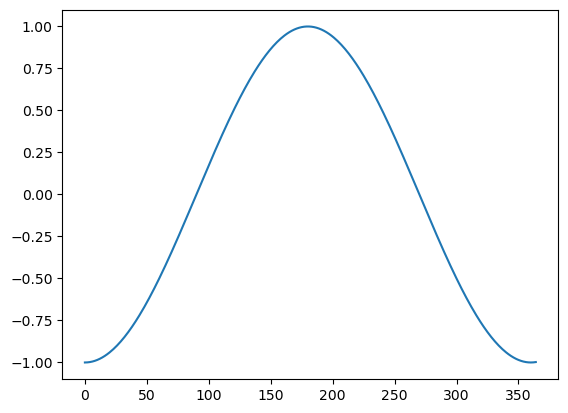

In [2]:
# Part 1 - Creating data

# models real life trends
cos = -1 * np.cos(2 * np.pi / 360 * np.arange(365))
days = np.arange(365)

# cos graph
plt.plot(days, cos)
plt.show()

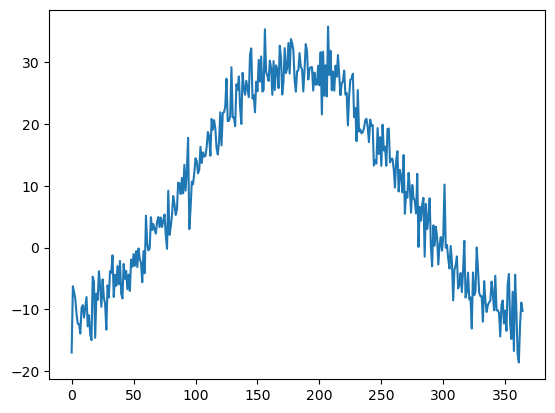

In [3]:
# random generator
rng = np.random.default_rng()

# change cos range (-1, 1) to more realistic (-10, 30)
temps = cos + 1
temps = temps * 20 - 10
temps = temps + rng.normal(size=365, scale=3)

# plot
plt.plot(days, temps)
plt.show()

In [4]:
# Part 2 - Data Analysis
avgTemp = np.sum(temps)/len(days)
print("Average temperature through the year is ", avgTemp, " Celcius")
maxTemp = np.max(temps)
maxDay = days[np.argmax(temps)]
print("Max temperature was ", maxTemp, " Celcius on day ", maxDay)
minTemp = np.min(temps)
minDay = days[np.argmin(temps)]
print("Min temperature was ", minTemp, " Celcius on day ", minDay)

Average temperature through the year is  9.44561092728899  Celcius
Max temperature was  35.755810797894576  Celcius on day  207
Min temperature was  -18.569385120781277  Celcius on day  361


In [5]:
# days (and temp) in which the temperature was under -14 C
dUnder = np.where(temps < -14)[0]
tUnder = temps[dUnder]
underMatrix = np.column_stack((dUnder, tUnder))
underTuples = list(zip(dUnder, tUnder))
for t in underTuples:
    print("On day ", t[0], " the temperature was ", t[1], " Celcius")

On day  0  the temperature was  -16.9610863832443  Celcius
On day  16  the temperature was  -14.953290329726203  Celcius
On day  19  the temperature was  -14.574769095110835  Celcius
On day  346  the temperature was  -14.373951061238587  Celcius
On day  355  the temperature was  -14.765823700739855  Celcius
On day  357  the temperature was  -16.718954024698785  Celcius
On day  360  the temperature was  -17.152679076089996  Celcius
On day  361  the temperature was  -18.569385120781277  Celcius


In [6]:
# Part 3 - Monthly breakdown
temps = temps[:360] # for simplicity
temps = temps.reshape(12, 30)

m = 0
for i in range(12):
    m += 1
    avgTemp = np.round(np.sum(temps[i]) / len(temps[i]), decimals = 3)
    print("For month ", m, " the average temperature was ", avgTemp, " Celcius")

For month  1  the average temperature was  -9.689  Celcius
For month  2  the average temperature was  -3.984  Celcius
For month  3  the average temperature was  4.72  Celcius
For month  4  the average temperature was  14.253  Celcius
For month  5  the average temperature was  24.139  Celcius
For month  6  the average temperature was  29.02  Celcius
For month  7  the average temperature was  28.431  Celcius
For month  8  the average temperature was  24.009  Celcius
For month  9  the average temperature was  14.823  Celcius
For month  10  the average temperature was  4.666  Celcius
For month  11  the average temperature was  -3.859  Celcius
For month  12  the average temperature was  -9.365  Celcius


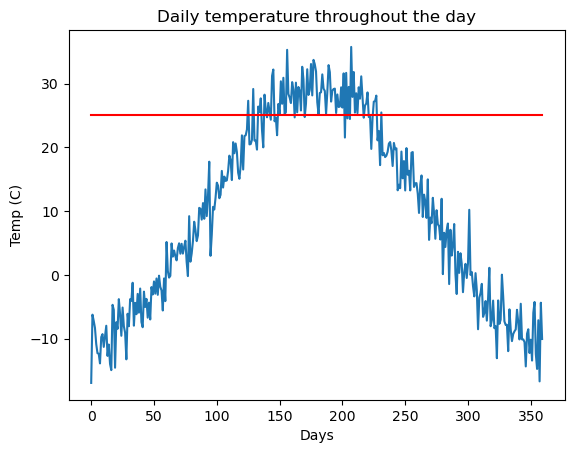

In [7]:
# Part 4 - Visualization
temps = temps.ravel() # flatten
days = days[:360] # since we changed temps
plt.plot(days, temps, days, np.full(360, 25), "r")
plt.xlabel('Days')
plt.ylabel('Temp (C)')
plt.title('Daily temperature throughout the day')
plt.show()

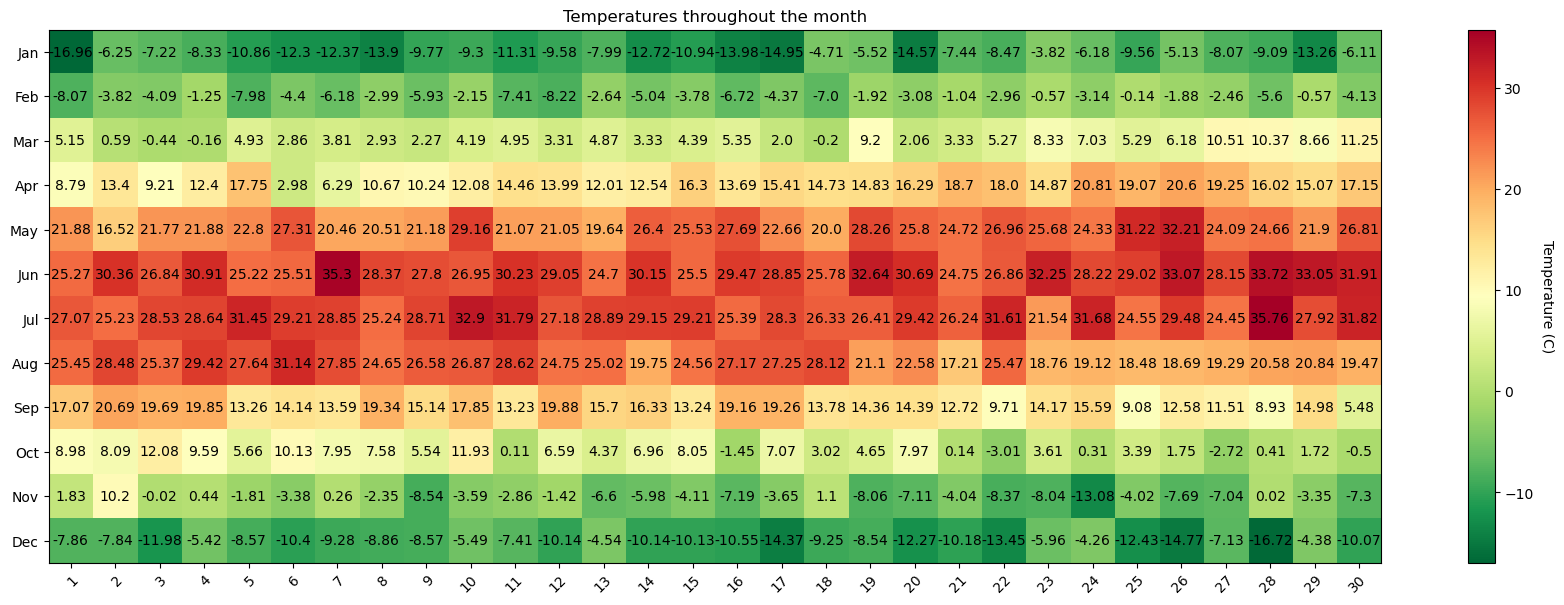

In [36]:
# Part 5 - Stretch goals
temps = np.round(temps.reshape(12, 30), decimals=2)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
days = [i for i in range(1, 31)]


fig, ax = plt.subplots(figsize=(18, 6))
im = ax.imshow(temps, cmap="RdYlGn_r")

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(days)), labels=days,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(months)), labels=months)

# Loop over data dimensions and create text annotations.
for i in range(len(months)):
    for j in range(len(days)):
        text = ax.text(j, i, temps[i, j],
                       ha="center", va="center", color="black")

cbar = fig.colorbar(im, ax = ax)
cbar.set_label("Temperature (C)", rotation=270, labelpad=15)
ax.set_title("Temperatures throughout the month")
fig.tight_layout()
plt.show()

In [49]:
# Saving to CSV
df = pd.DataFrame(temps)
df.to_csv("temps.csv")

# Loading data
data = pd.read_csv("temps.csv")
print(data)

    Unnamed: 0      0      1      2      3      4      5      6      7      8  \
0            0 -16.96  -6.25  -7.22  -8.33 -10.86 -12.30 -12.37 -13.90  -9.77   
1            1  -8.07  -3.82  -4.09  -1.25  -7.98  -4.40  -6.18  -2.99  -5.93   
2            2   5.15   0.59  -0.44  -0.16   4.93   2.86   3.81   2.93   2.27   
3            3   8.79  13.40   9.21  12.40  17.75   2.98   6.29  10.67  10.24   
4            4  21.88  16.52  21.77  21.88  22.80  27.31  20.46  20.51  21.18   
5            5  25.27  30.36  26.84  30.91  25.22  25.51  35.30  28.37  27.80   
6            6  27.07  25.23  28.53  28.64  31.45  29.21  28.85  25.24  28.71   
7            7  25.45  28.48  25.37  29.42  27.64  31.14  27.85  24.65  26.58   
8            8  17.07  20.69  19.69  19.85  13.26  14.14  13.59  19.34  15.14   
9            9   8.98   8.09  12.08   9.59   5.66  10.13   7.95   7.58   5.54   
10          10   1.83  10.20  -0.02   0.44  -1.81  -3.38   0.26  -2.35  -8.54   
11          11  -7.86  -7.84

In [ ]:
# Finding heatwaves (3 or more days > 30C)
temps = temps.ravel() # shallow copy
hot = temps > 30

padded = np.r_[False, hot, False] # array concatenation
change_idx = np.flatnonzero(padded[1:] != padded[:-1])

runs = [(s, e) for s, e in zip(change_idx[::2], change_idx[1::2]) if e - s >= 3]
runs



[(np.int64(122), np.int64(132)),
 (np.int64(133), np.int64(137)),
 (np.int64(138), np.int64(223)),
 (np.int64(224), np.int64(230))]

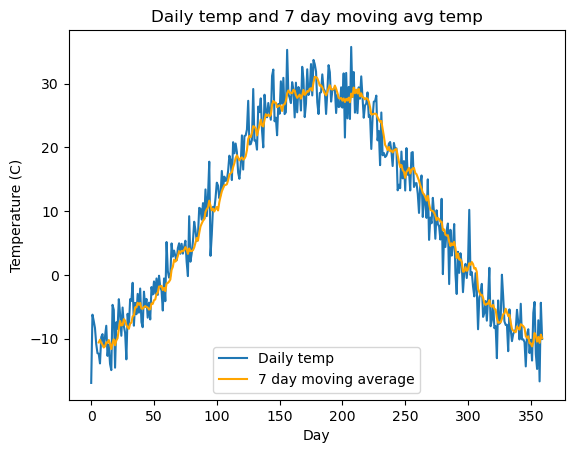

In [70]:
# 7 day moving average
window = 7
weights = np.ones(window) / window
temps_ma = np.convolve(temps, weights, mode='valid')

plt.plot(temps, label = "Daily temp")
plt.plot(range(window - 1, len(temps)), temps_ma, color='orange', label = '7 day moving average')
plt.xlabel("Day")
plt.ylabel("Temperature (C)")
plt.title("Daily temp and 7 day moving avg temp")
plt.legend()
plt.show()